## Data Preparation

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'OnlineRetail.csv'
data = pd.read_csv(file_path, encoding='ISO-8859-1')

data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [42]:
# Convert the InvoiceDate to a datetime object
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Filter out canceled orders (transactions with negative quantities)
data = data[data['Quantity'] > 0]

# Drop rows with missing CustomerID
data = data.dropna(subset=['CustomerID'])

# Add a new column for total sales
data['TotalSales'] = data['Quantity'] * data['UnitPrice']

# Log transform the monetary value to handle extreme values
data['TotalSales'] = data['TotalSales'].apply(lambda x: x if x > 0 else 1)
data['LogTotalSales'] = np.log(data['TotalSales'])

# Display the first few rows of the processed data
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,LogTotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2.727853
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,3.012589
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,3.091042
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,3.012589
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,3.012589


## Exploratory Data Analysis (EDA)

In [43]:
descriptive_stats = data.describe()
display(descriptive_stats)

,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalSales,LogTotalSales
count,397924.000000,397924,397924.000000,397924.000000,397924.000000,397924.000000
mean,13.021823,2011-07-10 23:43:36.912475648,3.116174,15294.315171,22.394849,2.289264
min,1.000000,2010-12-01 08:26:00,0.000000,12346.000000,0.001000,-6.907755
25%,2.000000,2011-04-07 11:12:00,1.250000,13969.000000,4.680000,1.543298
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000,11.800000,2.468100
75%,12.000000,2011-10-20 14:33:00,3.750000,16795.000000,19.800000,2.985682
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000,168469.600000,12.034511
std,180.420210,NaN,22.096788,1713.169877,309.055581,1.188573


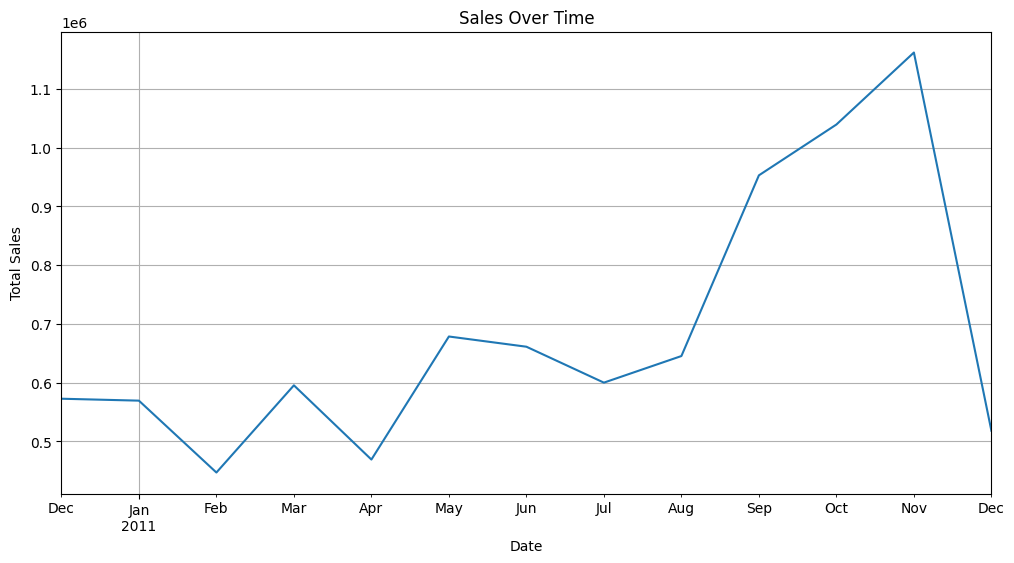

In [44]:
# Sales Over Time
sales_over_time = data.resample('M', on='InvoiceDate').sum()['TotalSales']

plt.figure(figsize=(12, 6))
sales_over_time.plot()
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

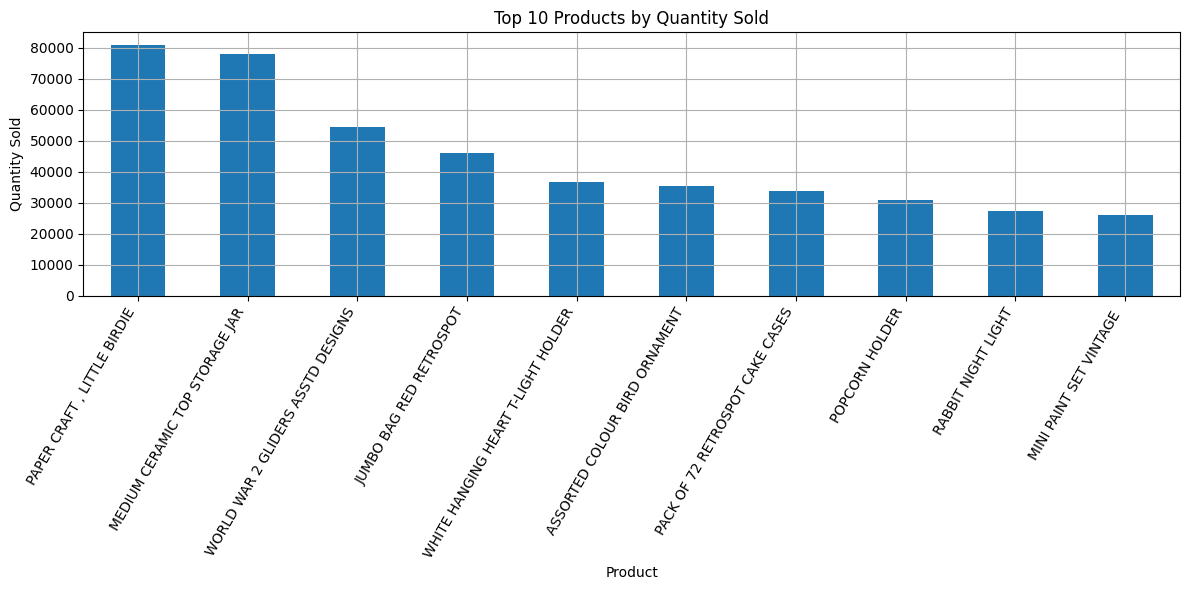

In [45]:
# Top Products by Sales Quantity
top_products = data.groupby('Description').sum(numeric_only=True)['Quantity'].sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_products.plot(kind='bar')
plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('Product')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=60, fontsize=10, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

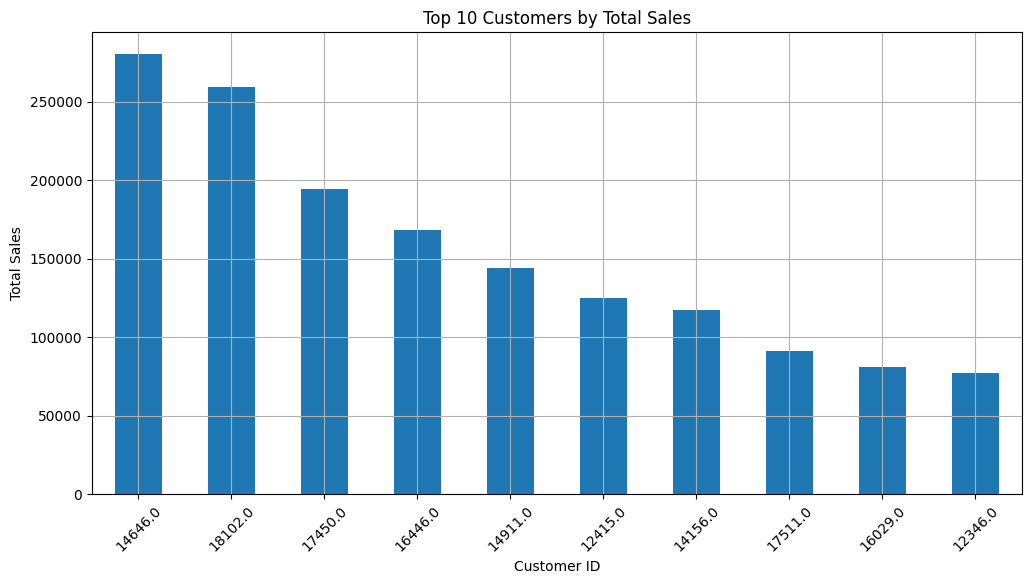

In [46]:
# Customer Analysis: Total Sales by Customer
customer_sales = data.groupby('CustomerID').sum(numeric_only=True)['TotalSales'].sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
customer_sales.plot(kind='bar')
plt.title('Top 10 Customers by Total Sales')
plt.xlabel('Customer ID')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

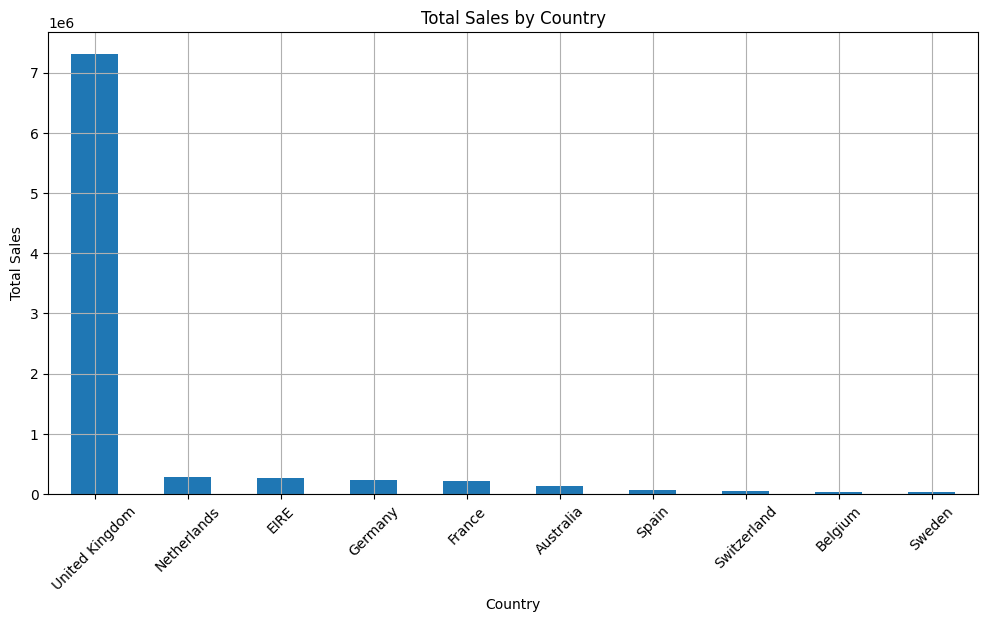

In [47]:
# Country Analysis: Total Sales by Country
country_sales = data.groupby('Country').sum(numeric_only=True)['TotalSales'].sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
country_sales.plot(kind='bar')
plt.title('Total Sales by Country')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

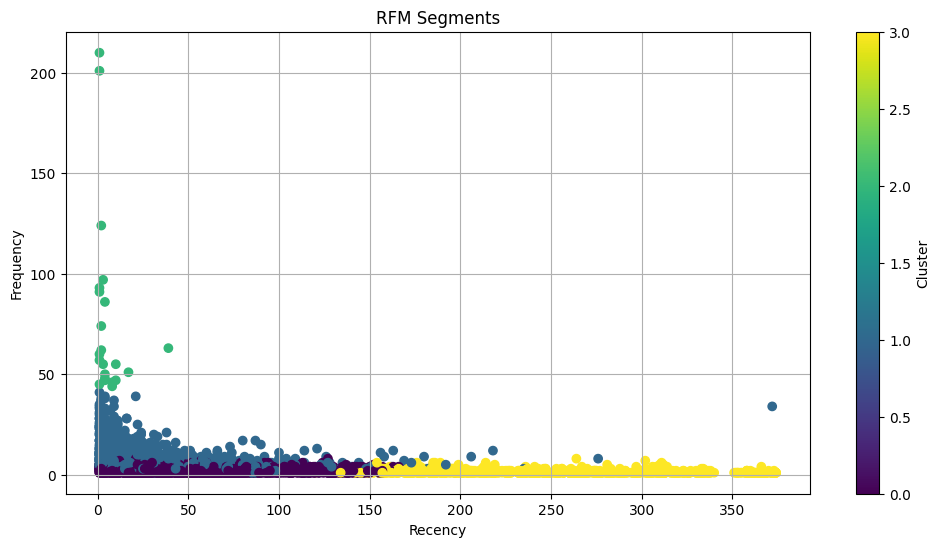

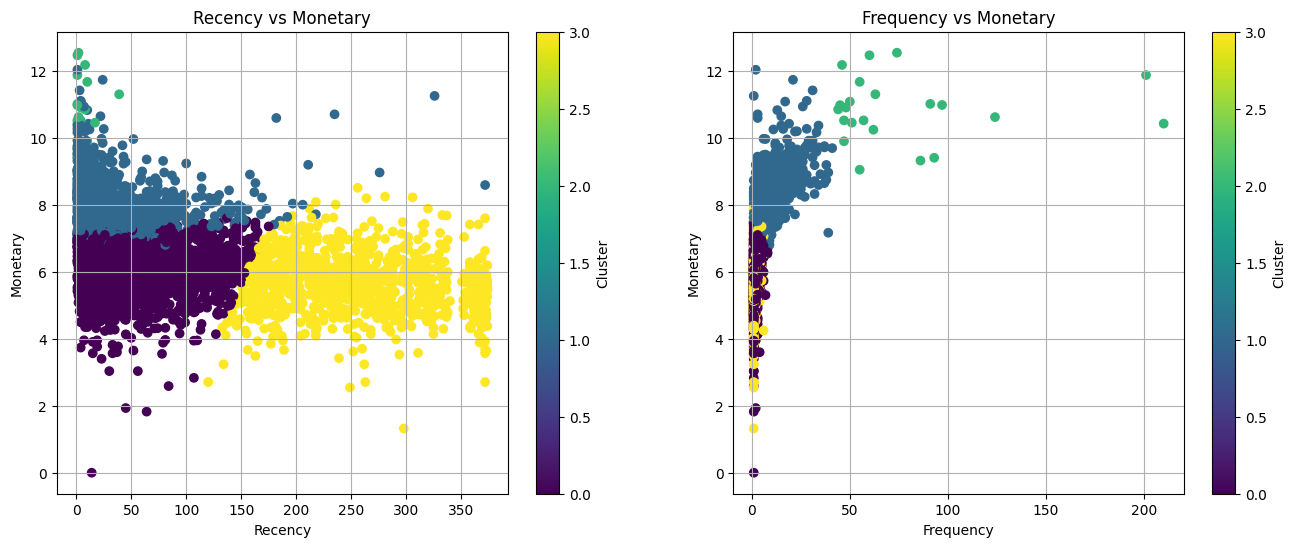

In [48]:
# RFM Calculation
current_date = data['InvoiceDate'].max() + pd.DateOffset(days=1)
rfm = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (current_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalSales': 'sum'
}).reset_index()

# Rename the columns to Recency, Frequency, Monetary
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Log transform the monetary value
rfm['Monetary'] = rfm['Monetary'].apply(lambda x: x if x > 0 else 1)
rfm['Monetary'] = np.log(rfm['Monetary'])

# Clustering
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Visualizing RFM Segments
plt.figure(figsize=(12, 6))
plt.scatter(rfm['Recency'], rfm['Frequency'], c=rfm['Cluster'], cmap='viridis')
plt.title('RFM Segments')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# Detailed visualization of clusters
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Recency vs Monetary
scatter = ax1.scatter(rfm['Recency'], rfm['Monetary'], c=rfm['Cluster'], cmap='viridis')
ax1.set_title('Recency vs Monetary')
ax1.set_xlabel('Recency')
ax1.set_ylabel('Monetary')
ax1.grid(True)

# Frequency vs Monetary
scatter = ax2.scatter(rfm['Frequency'], rfm['Monetary'], c=rfm['Cluster'], cmap='viridis')
ax2.set_title('Frequency vs Monetary')
ax2.set_xlabel('Frequency')
ax2.set_ylabel('Monetary')
ax2.grid(True)

fig.colorbar(scatter, ax=ax1, label='Cluster')
fig.colorbar(scatter, ax=ax2, label='Cluster')

plt.show()